In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [36]:
# Load the Dataset
data = pd.read_csv('medical_insurance.csv')

# EDA
print(data.shape)
print(data.head())
print(data.describe())
print(data.info()) 

(1338, 8)
   age  gender   bmi  children discount_eligibility     region  expenses  \
0   19  female  27.9         0                  yes  southwest  16884.92   
1   18    male  33.8         1                   no  southeast   1725.55   
2   28    male  33.0         3                   no  southeast   4449.46   
3   33    male  22.7         0                   no  northwest  21984.47   
4   32    male  28.9         0                   no  northwest   3866.86   

    premium  
0  168.8492  
1   17.2555  
2   44.4946  
3  439.6894  
4   77.3372  
               age          bmi     children      expenses      premium
count  1338.000000  1338.000000  1338.000000   1338.000000  1338.000000
mean     39.207025    30.665471     1.094918  13270.422414   262.874685
std      14.049960     6.098382     1.205493  12110.011240   292.532178
min      18.000000    16.000000     0.000000   1121.870000    11.218700
25%      27.000000    26.300000     0.000000   4740.287500    87.354250
50%      39.00000

In [37]:
# Check the Missing Values
data.isnull().sum()

age                     0
gender                  0
bmi                     0
children                0
discount_eligibility    0
region                  0
expenses                0
premium                 0
dtype: int64

In [38]:
print(data['region'].value_counts(), 
      data['discount_eligibility'].value_counts(),
      data['gender'].value_counts())


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64 discount_eligibility
no     1064
yes     274
Name: count, dtype: int64 gender
male      676
female    662
Name: count, dtype: int64


In [39]:
data.groupby('region')['expenses'].mean()

region
northeast    13406.384691
northwest    12417.575169
southeast    14735.411538
southwest    12346.937908
Name: expenses, dtype: float64

In [40]:
# Encoding Categorical Variables
data['gender'] = data['gender'].map({'male': 0, 'female': 1})
data['discount_eligibility'] = data['discount_eligibility'].map({'no': 0, 'yes': 1})
data['region'] = data['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

<Axes: >

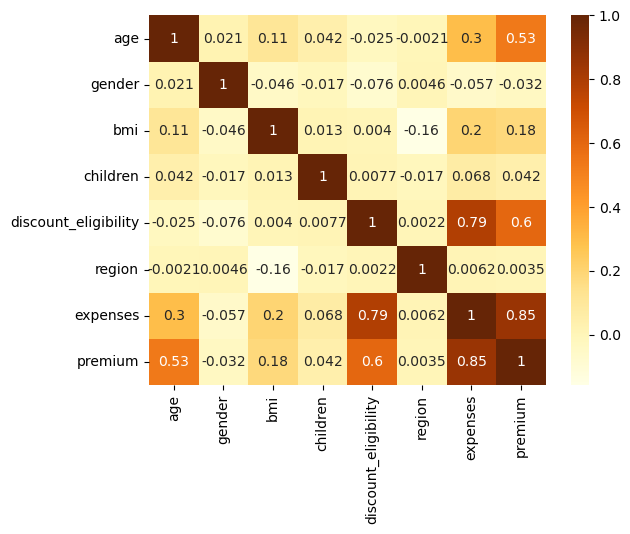

In [41]:
sns.heatmap(data.corr(), annot=True, cmap='YlOrBr')

In [72]:
max(data['bmi'])

53.1

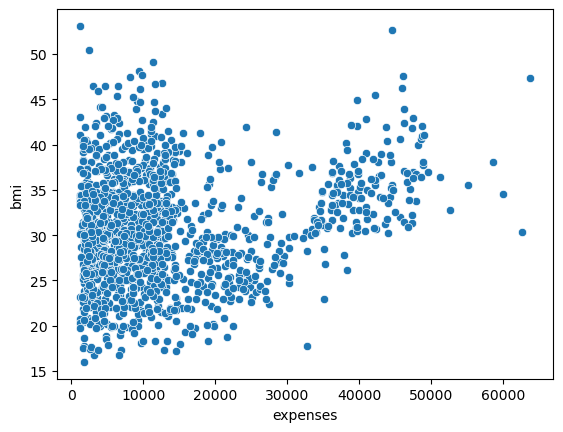

In [43]:
plot = sns.scatterplot(x='expenses',  y='bmi', data=data)

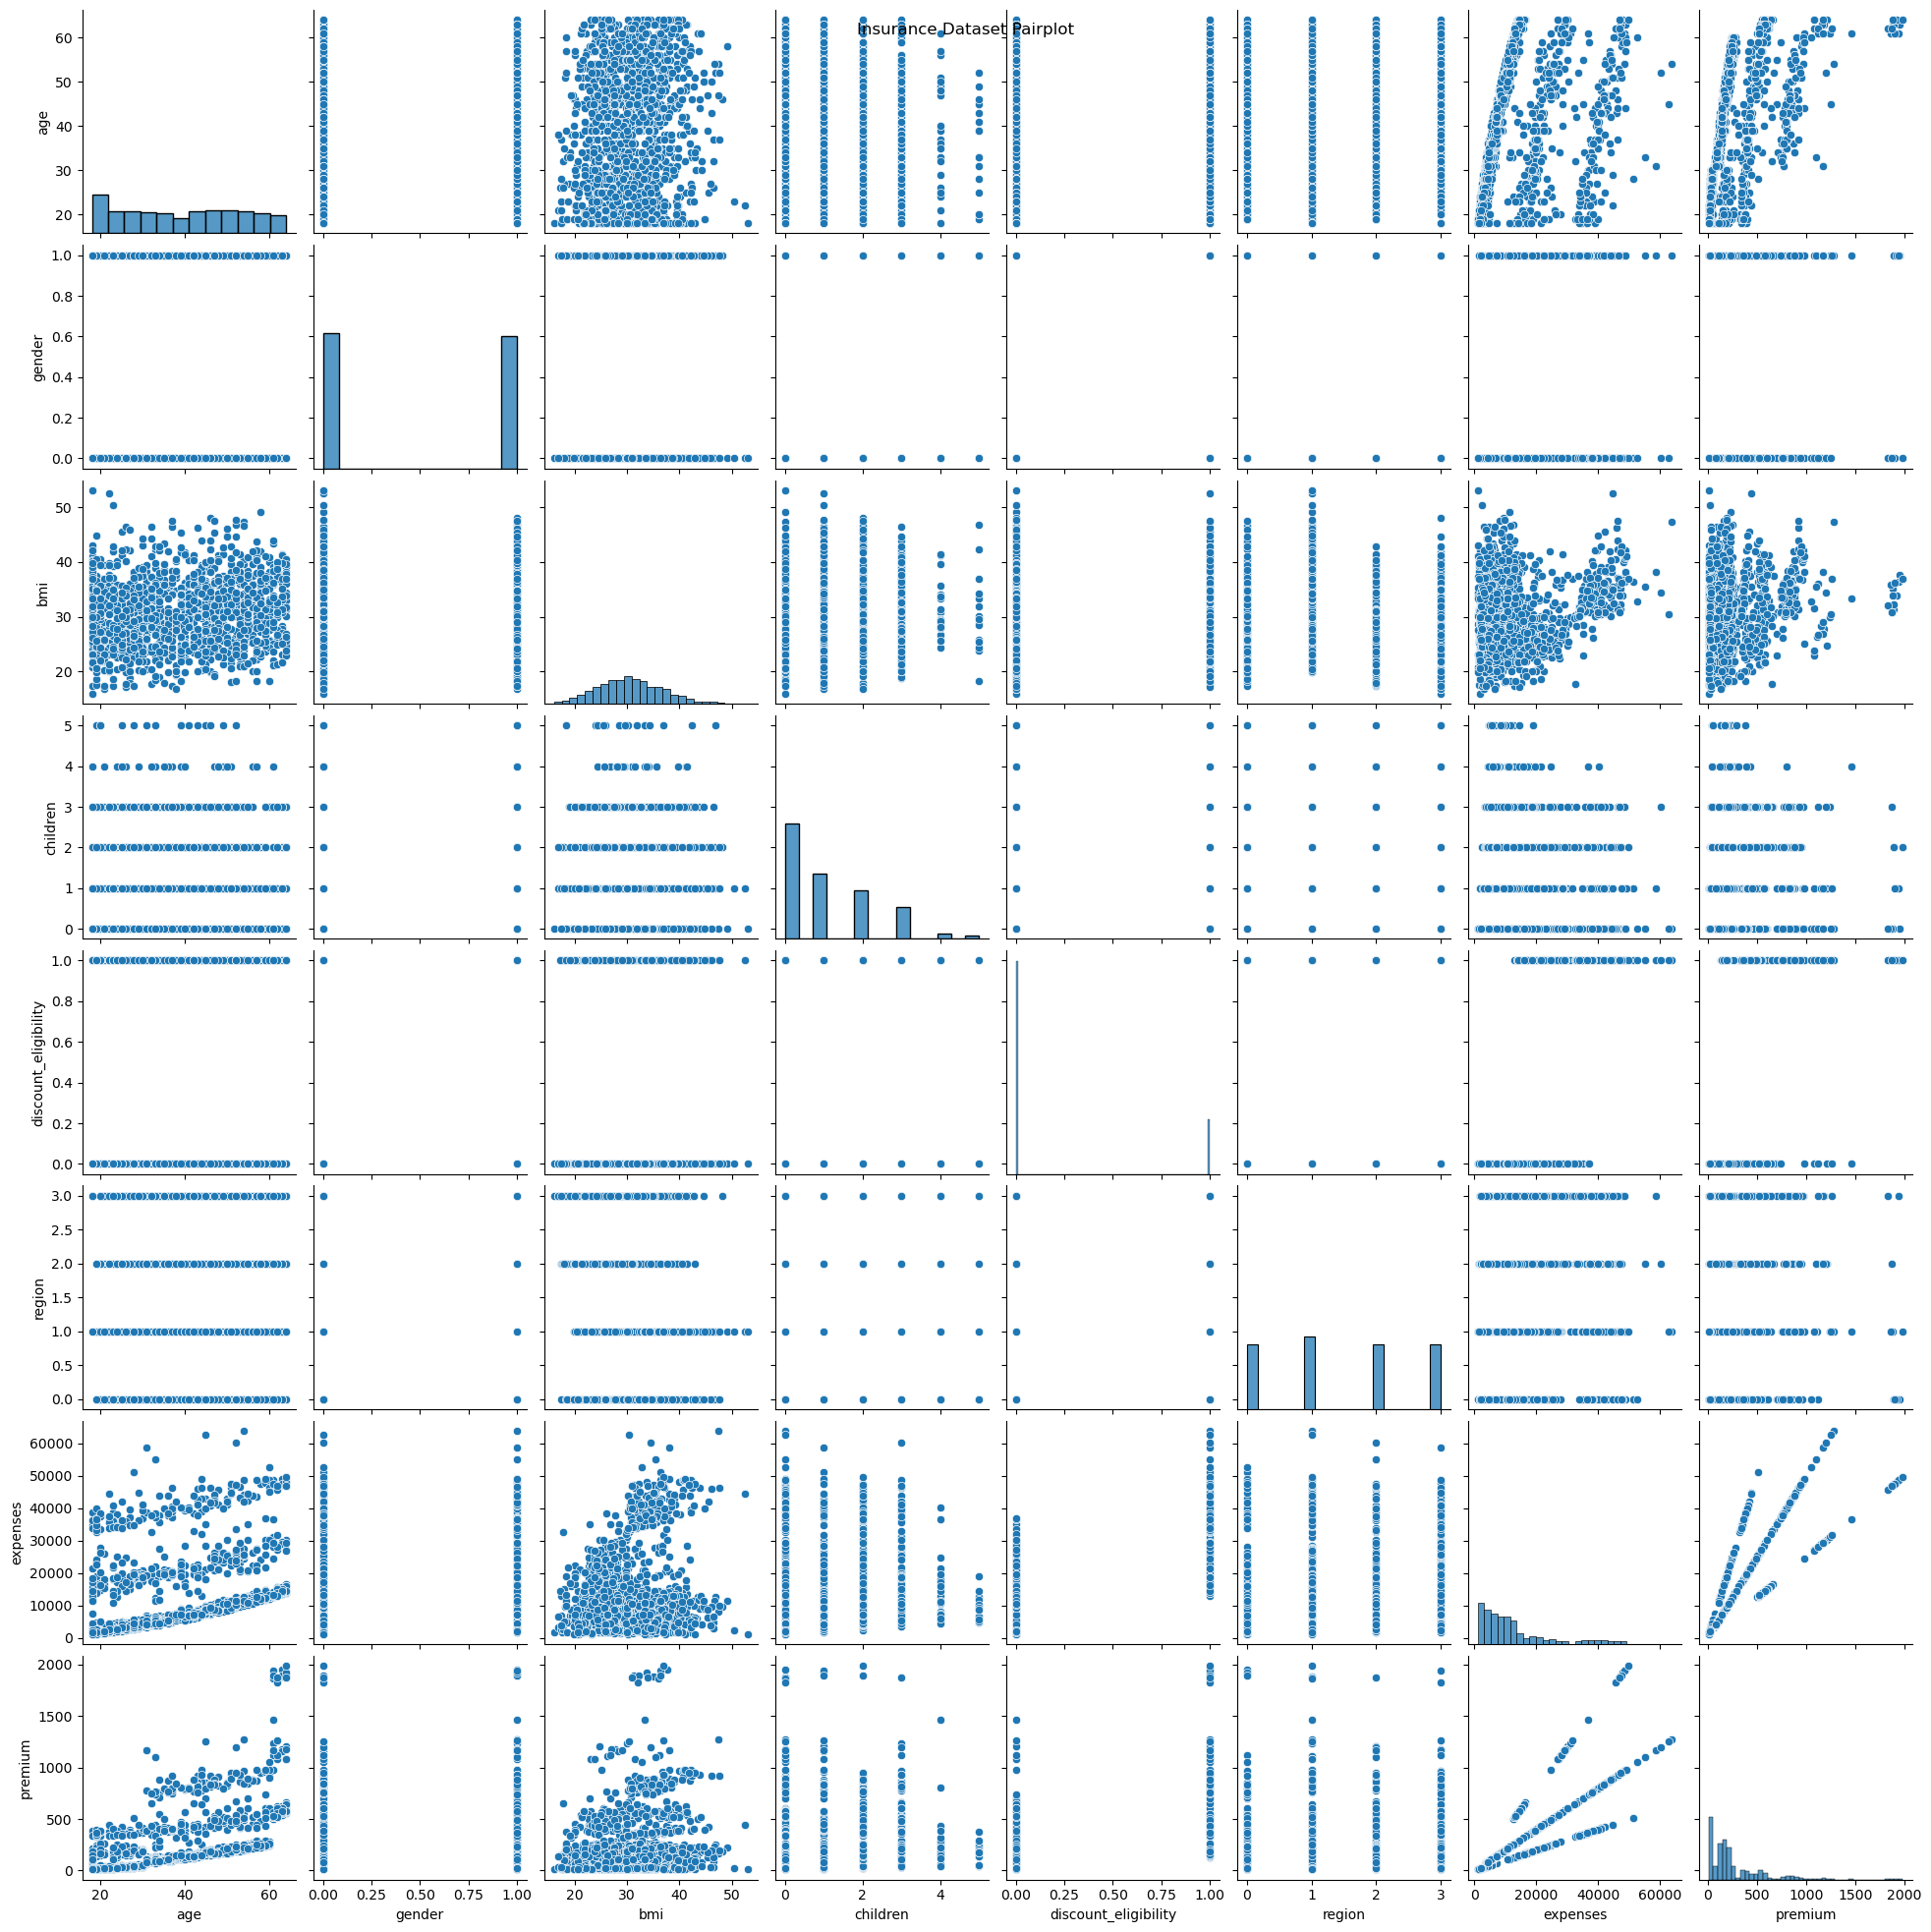

In [44]:
plot = sns.pairplot(data, height=2.5)
plot.figure.suptitle('Insurance Dataset Pairplot')

for ax in plot.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10)


<Axes: >

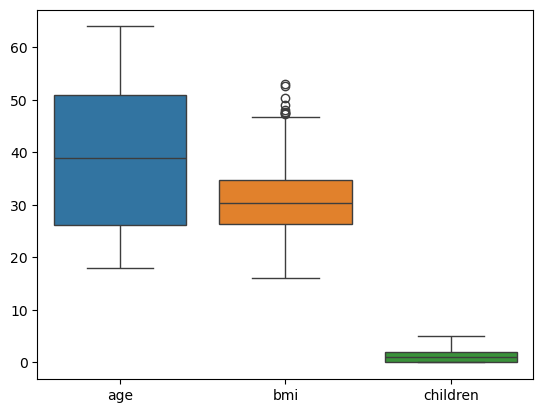

In [68]:
sns.boxplot(data[['age', 'bmi', 'children']])

In [ ]:
#Outliers
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1

outliers = data[(data['bmi'] < Q1 - 1.5*IQR) | (data['bmi'] > Q3 + 1.5*IQR)]

outliers

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
116,58,0,49.1,0,0,1,11381.33,227.6266
286,46,1,48.1,2,0,3,9432.93,188.6586
401,47,0,47.5,1,0,1,8083.92,161.6784
543,54,1,47.4,0,1,1,63770.43,1275.4086
847,23,0,50.4,1,0,1,2438.06,24.3806
860,37,1,47.6,2,1,0,46113.51,922.2702
1047,22,0,52.6,1,1,1,44501.40,445.0140
1088,52,0,47.7,1,0,1,9748.91,194.9782
1317,18,0,53.1,0,0,1,1163.46,11.6346


In [47]:
exact_duplicates =data[data.duplicated()]
exact_duplicates 

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
581,19,0,30.6,0,0,2,1639.56,16.3956


In [48]:
data.iloc[len(data) - 1] = data.iloc[0]
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337     True
Length: 1338, dtype: bool

In [49]:
data.drop_duplicates(subset=['age', 'expenses'], keep='last')

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
1,18,0,33.8,1,0,1,1725.55,17.2555
2,28,0,33.0,3,0,1,4449.46,44.4946
3,33,0,22.7,0,0,2,21984.47,439.6894
4,32,0,28.9,0,0,2,3866.86,77.3372
5,31,1,25.7,0,0,1,3756.62,75.1324
...,...,...,...,...,...,...,...,...
1333,50,0,31.0,3,0,2,10600.55,212.0110
1334,18,1,31.9,0,0,3,2205.98,22.0598
1335,18,1,36.9,0,0,1,1629.83,16.2983
1336,21,1,25.8,0,0,0,2007.95,20.0795


In [50]:
data['premium'].unique()

array([168.8492,  17.2555,  44.4946, ...,  22.0598,  16.2983,  20.0795],
      shape=(1336,))

In [51]:
pd.to_numeric(data['expenses'], errors='raise')

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    16884.92
Name: expenses, Length: 1338, dtype: float64

In [52]:
assert len(data['gender'].unique()) == 2

In [53]:
data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [54]:
data['premium'].describe()

count    1338.000000
mean      262.129689
std       291.498800
min        11.218700
25%        87.354250
50%       174.677200
75%       342.321050
max      1983.106400
Name: premium, dtype: float64

In [55]:
data.memory_usage()

Index                     132
age                     10704
gender                  10704
bmi                     10704
children                10704
discount_eligibility    10704
region                  10704
expenses                10704
premium                 10704
dtype: int64

In [56]:

mixed_types = {}
for column in data.columns:
    types = data[column].apply(lambda x: type(x).__name__).value_counts()
    mixed_types[column] = types.to_dict()
    

In [57]:
mixed_types

{'age': {'int': 1338},
 'gender': {'int': 1338},
 'bmi': {'float': 1338},
 'children': {'int': 1338},
 'discount_eligibility': {'int': 1338},
 'region': {'int': 1338},
 'expenses': {'float': 1338},
 'premium': {'float': 1338}}

In [58]:
def clean_numeric_column(series):
    # Convert to numeric, forcing errors to NaN
    numeric_series = pd.to_numeric(series, errors="coerce")

    # Check what percentage of data was lost
    percent_lost = (series.dropna().size - numeric_series.count()) / series.size * 100

    print(f"Percentage of data lost: {percent_lost:.2f}%")
    return numeric_series

In [59]:
clean_numeric_column(data["expenses"])

Percentage of data lost: 0.00%


0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    16884.92
Name: expenses, Length: 1338, dtype: float64

In [60]:
data.isnull().sum()

age                     0
gender                  0
bmi                     0
children                0
discount_eligibility    0
region                  0
expenses                0
premium                 0
dtype: int64

In [61]:
data.dtypes

age                       int64
gender                    int64
bmi                     float64
children                  int64
discount_eligibility      int64
region                    int64
expenses                float64
premium                 float64
dtype: object

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1338 non-null   int64  
 1   gender                1338 non-null   int64  
 2   bmi                   1338 non-null   float64
 3   children              1338 non-null   int64  
 4   discount_eligibility  1338 non-null   int64  
 5   region                1338 non-null   int64  
 6   expenses              1338 non-null   float64
 7   premium               1338 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 83.8 KB


In [63]:
data.select_dtypes(include=[object])

""
0
1
2
3
4
...
1333
1334
1335
1336


In [64]:
data.describe()

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.175635,0.494768,30.664574,1.094918,0.204783,1.482810,13261.262145,262.129689
std,14.048152,0.500160,6.098701,1.205493,0.403694,1.105539,12102.630413,291.498800
min,18.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1121.870000,11.218700
25%,26.250000,0.000000,26.300000,0.000000,0.000000,1.000000,4740.287500,87.354250
50%,39.000000,0.000000,30.400000,1.000000,0.000000,1.000000,9382.030000,174.677200
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16639.915000,342.321050
max,64.000000,1.000000,53.100000,5.000000,1.000000,3.000000,63770.430000,1983.106400


In [65]:
data['discount_eligibility'].unique()

array([1, 0])